## **V-CHAMPS - Hospital Readmission for All Causes & Hospital Readmission Cardiovascular Causes**

---------------------------------------
**We have done analysis for all 16 CSV files, based on the analysis we have skipped these files.**
1) Inpatient location
2) Inpatient specialty
3) Demographic event
4) Demographic Static
5) Medication_ordered
6) Medications_administered
7) Ed_visit
8) Outpatient_visit
9) Procedures

**Only we took these below seven high potential files for the Readmission.**
1) Inpatient admission
2) Conditions
3) Immunization
4) Lab results
5) Measurements
6) Measurements blood pressure
7) Readmission

For this seven files we have generated python notebooks, which is present in the respective folder.


--------

# **Content:**

- Dataset Description
- Importing Libraries
- **Train Data - Retrieve the Train Data**
  - Missing Values Imputation for Train Data
  - Taking Sample Train Data
  - Splitting the Train Dataframe into Textual, Numerical, and Target
  - Standardizing the Numerical Columns in Train Data
  - Word Embedding for Textual Data in Train Data
  - Concatenating Standardized Vectors and Embedded Vectors for TRAIN Data
  
- **Test Data - Retrieve the Test Data**
    - Missing Values Imputation for Test Data
    - Splitting the Test Dataframe into Textual, Numerical, and Target
    - Standardizing the Numerical Columns in Test Data
    - Word Embedding for Textual Data in Test Data
    - Concatenating Standardized Vectors and Embedded Vectors for TEST Data
    
   - **Models Building**
        - XGBoost Classifier
            - Tier-1 Statistics Metrics for All Cause Readmission
            - Tier-2 Statistics Metrics for All Cause Readmission
        - Importing CV_Non CV Target Generated File
            - Tier 1 Statistics Metrics for Readmitted CV Patients
            - Tier 2 Statistics Metrics for Readmitted CV Patients
            - Generating the Figure-one CSV as per FDA
            
- **Quality Data - Retrieve the Quality Data**
    - Missing Values Imputation for Quality Data
    - Splitting the Quality Dataframe into Textual and Numerical
    - Standardizing the Numerical Columns in Quality Data
    - Word Embedding for Textual Data in Quality Data
    - Concatenating Standardized Vectors and Embedded Vectors for Quality Data
    - XGBoost Classifier  
    - Importing CV_Non CV Target Generated File
       - Merging Cardiovascular Patients and All Cause Readmitted Patients
       - Generating the Figure-one CSV as per FDA

---

## **Dataset Description:**

#### **1. Inpatient admissions**
   - **Potential columns:**
        - Internalpatientid
        - Age at admission
        - First listed discharge diagnosis icd10 subcategory
        - Second listed discharge diagnosis icd10 subcategory
   - **Feature Engineering:**
        - Firstly, we round off the ages to one decimal place. Then, I take the maximum age for the 'Age at admission' column and group it by 'Internalpatientid', resulting in only one record for each patient.

---

#### **2. Conditions**
   - **Potential columns:**
        - Internalpatientid
        - Age at condition documentation
        - Condition code icd10 subcategory
   - **Feature Engineering:**
        - Firstly, we round off the ages to two decimal places. Then, we extract the maximum age from the 'Age at condition documentation' column. Afterward, we merge the "Age at condition documentation" and "Condition code icd10 subcategory" columns with an underscore. 
        - Next, we group the data by 'Internalpatientid', resulting in obtaining the most recent record for each patient.

---

#### **3. Immunizations**
   - **Potential columns:**
        - Internalpatientid
        - Age at immunization
        - Immunization
   - **Feature Engineering:**
        - Firstly, we round off the ages to two decimal places. Then, we extract the maximum age from the 'Age at immunization' column. Afterward, we merge the "Age at immunization" and "Immunization" columns with an underscore. 
        - Next, we group the data by 'Internalpatientid', resulting in obtaining the most recent record for each patient.

---

#### **4. Lab results**
   - **Potential columns:**
        - Internalpatientid
        - Age at lab test
        - Lab test description
        - Result numeric
        - Result textual
   - **Feature Engineering:**
        - Firstly, we round off the ages to two decimal places. Then, we extract the maximum age from the 'Age at condition documentation' column. Afterward, we merge the "Age at condition documentation" and "Condition code icd10 subcategory" columns with an underscore. 
        - Next, we group the data by 'Internalpatientid', resulting in obtaining the most recent record for each patient. These selected patients are then taken into consideration for the mortality prediction.

---

#### **5. Measurements Blood Pressure**
   - **Potential columns:**
        - Internalpatientid
        - Age at Measurement bp
        - Systolic bp
        - Diastolic bp 
   - **Feature Engineering:**
        - Taking maximum age for the 'Age at measurement bp' column and group it by with 'Internalpatientid'. Eventually we got only one record for each patient.

---

#### **6. Measurements**
   - **Potential columns:**
        - Internalpatientid
        - Measurement date
        - Measurements
        - Result numeric
   - **Feature Engineering:**
        - In the 'Measurements' file, we applied the 'Max' condition to the 'Measurement date' column and then grouped the data by 'Internalpatientid.' This ensured that only the latest measurement details were retained for each patient. 
        - Subsequently, the data was transformed into a pivot level, creating separate columns for each potential categorical variable found in the 'Measurement' column. As a result, each patient now has values for 'Pain', 'Pulse', 'Respiratory rate', and 'Temperature'.

-----------------

#### **7. Readmission**
   - **Potential columns:**
        - Internalpatientid
        - Readmission
   - **Feature Engineering:**
        - In the 'Inpatient admissions' file, I examined the number of occurrences of each patient using the 'Internalpatientid' column. Based on this, I created a new column where I assigned a value of 1 if the patient's count was more than one, and 0 if the count was exactly one. 
        - This process helped us generate the target column for readmission. 
        
**Note:** You can find more details and code in the Python notebook located in the respective folder.

---

### **Importing Libraries**

In [ ]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install scikit-learn
#pip install nltk
#pip install gensim
#pip install xgboost
#pip install sentence-transformers

In [1]:
# Importing essential libraries
import pandas as pd                 # Library for data manipulation and analysis
import numpy as np                  # Library for mathematical operations
import matplotlib.pyplot as plt     # Library for data visualization
import seaborn as sns               # Library for advanced data visualization

from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve,average_precision_score, confusion_matrix, precision_score, f1_score

import xgboost as xgb

### **Train data - Retrieve the train data**

In [2]:
# List of file paths
file_paths = [ '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_conditions_train.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_immunizations_train.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_lab_results_train_with_age_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_inpatient_admission_train.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_measurements_blood_pressure_train_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_measurements_pivot_train_v1.csv', 
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_readmission_train.csv'
]

# Read the first file to create the merged DataFrame
merged_df = pd.read_csv(file_paths[0])
merged_df.drop(["Unnamed: 0"], axis=1, inplace =True)

for file_path in file_paths[1:]:
    df = pd.read_csv(file_path) # read the csv file into the dataframe
    if "Unnamed: 0" in df.columns:
        df.drop(["Unnamed: 0"], axis=1, inplace =True)
    #merged_df ios the first that actually we read'''
    merged_df = merged_df.merge(df, on='Internalpatientid', how='outer') # merge with existing merged_df dataframe and how='outer' which perform the outer join

In [3]:
merged_df

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory,inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,Readmission
0,1,"80_Hyperlipidemia, unspecified,80_Other and un...","80_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","80_Alpha Fetoprotein_3.0,80_INR -TOP_1.68,80_P...",79_Contusion of hip,79_Unspecified atrial fibrillation and atrial ...,72.0,123.0,0.0,61.0,17.0,102.765598,1.0
1,2,"70_Not specified,70_Fracture of coccyx","69_INFLUENZA, UNSPECIFIED FORMULATION,69_INFLU...","70_GLOBULIN, CALC._3.0,70_OSMOLALITY, CALC._30...","69_Acute kidney failure, unspecified,69_Acute ...","69_Systolic (congestive) heart failure,69_Chro...",65.0,111.0,0.0,91.0,19.0,92.922517,1.0
2,3,"82_Acquired absence of leg below knee,82_Encou...","82_INFLUENZA, UNSPECIFIED FORMULATION",82_WHOLE BLOOD GLUCOSE_123.0,81_Encounter for other specified aftercare,81_Acquired absence of leg below knee,59.0,118.0,0.0,52.0,19.0,93.886986,1.0
3,4,"84_Unspecified abdominal pain,84_Systolic (con...","84_FLU,3 YRS (HISTORICAL),84_INFLUENZA, SEASON...","84_MRSA SURVL NARES AGAR_NEGATIVE,84_ANCILLARY...",84_Acute gastric ulcer with hemorrhage,84_Non-ST elevation (NSTEMI) myocardial infarc...,70.0,146.0,0.0,69.0,20.0,94.900520,0.0
4,5,77_Encounter for screening for infectious and ...,"76_FLU,3 YRS (HISTORICAL)","77_PROTEIN, TOTAL_5.13,77_eGFR_49.0,77_POTASSI...",76_Acute and subacute infective endocarditis,76_Acute respiratory failure,91.0,158.0,0.0,100.0,28.0,100.819041,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133247,150797,NaN,NaN,87_MRSA SURVL NARES DNA_Negative,87_Malignant neoplasm of unspecified part of b...,"87_Pneumonia, unspecified organism",75.0,102.0,1.0,49.0,24.0,97.854060,1.0
133248,151250,NaN,NaN,"92_PROTIME*ne_12.98,92_INR*ne_1.17,92_RBC_2.63...",92_Other hemorrhoids,"92_Gastrointestinal hemorrhage, unspecified",72.0,128.0,0.0,131.0,13.0,99.279432,1.0
133249,164944,NaN,NaN,"72_WHOLE BLOOD GLUCOSE_226.0,72_POTASSIUM_4.27...",72_COVID-19,72_Acute respiratory distress syndrome,83.0,145.0,0.0,99.0,28.0,95.265067,0.0
133250,73689,NaN,NaN,NaN,56_COVID-19,56_Acute respiratory failure,87.0,131.0,0.0,87.0,28.0,93.973136,0.0


### **Missing Values Imputation for Train Data**

In [4]:
merged_df.isnull().sum()

Internalpatientid                                                               0
Condition_code_icd10_subcategory                                             1183
immunization                                                                 8093
Lab_test_description_Result                                                  4414
inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory     48716
inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory    48716
Diastolic bp                                                                 1220
Systolic bp                                                                  1220
Pain                                                                         3347
Pulse                                                                        3347
Respiratory rate                                                             3347
Temperature                                                                  3347
Readmission     

#### Replacing NaN Values in the Readmission Column with 0.

In [5]:
merged_df['Readmission'] = merged_df['Readmission'].fillna(0)

In [6]:
merged_df['Readmission'] = merged_df['Readmission'].astype('int')

#### Combining Two Columns into a New Column - Inpatient_admission_first_and_second_listed

In [7]:
# Combine the two columns into a new column separated by commas
merged_df['Inpatient_admission_first_and_second_listed'] = merged_df['inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory'] + ',' + merged_df['inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory']

# Remove the original columns
merged_df.drop(['inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory', 'inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory'], axis=1, inplace=True)

#### Replacing NaN Values in 'Inpatient_admission_first_and_second_listed' with Corresponding 'Condition_code_icd10_subcategory' Values

In [8]:
# Replace NaN values with corresponding 'Condition_code_icd10_subcategory' values
merged_df['Inpatient_admission_first_and_second_listed'] = merged_df['Inpatient_admission_first_and_second_listed'].fillna(merged_df['Condition_code_icd10_subcategory'])

#### Replacing NaN Values with "Positive/Negative" for Textual Columns

In [9]:
# Define the columns to replace NaN values
columns = ['Condition_code_icd10_subcategory','immunization', 'Lab_test_description_Result','Inpatient_admission_first_and_second_listed']

# Replace NaN values with "Positive" or "Negative"
merged_df[columns] = merged_df[columns].replace(np.nan, 'Positive/Negative')

#### Replacing Mean Values - 'Diastolic bp', 'Systolic bp', 'Pain', 'Pulse', 'Respiratory rate', 'Temperature'

In [10]:
mean_values = merged_df[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].mean()
mean_values

Pain                  1.727801
Pulse                77.619099
Respiratory rate     18.609261
Temperature          97.688380
Diastolic bp         70.009809
Systolic bp         125.855369
dtype: float64

In [11]:
# filling the null values
merged_df[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']] = merged_df[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].fillna(mean_values)

In [12]:
merged_df.isnull().sum()

Internalpatientid                              0
Condition_code_icd10_subcategory               0
immunization                                   0
Lab_test_description_Result                    0
Diastolic bp                                   0
Systolic bp                                    0
Pain                                           0
Pulse                                          0
Respiratory rate                               0
Temperature                                    0
Readmission                                    0
Inpatient_admission_first_and_second_listed    0
dtype: int64

In [13]:
merged_df.shape

(133252, 12)

### Taking Sample Train data

In [14]:
#Taking some sample data for training
df_train = merged_df.sample(n = 30000, random_state = 42)
df_train

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,Readmission,Inpatient_admission_first_and_second_listed
112422,143813,"69_Dental caries on smooth surface,69_Dental c...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","69_WBC_9.69,69_Hct_36.51,69_MPV_8.67,69_PLT_19...",69.0,120.0,7.000000,86.000000,18.000000,93.482373,1,62_Atherosclerotic heart disease of native cor...
37897,48430,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_A1c_8.24,75_AST_12.0,75_A/G RATIO_1.0,75_PO...",63.0,89.0,9.000000,95.000000,21.000000,99.936185,1,"61_Malignant neoplasm of prostate,61_Type 2 di..."
17169,21949,85_Problem related to unspecified psychosocial...,"84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","84_Mcv_88.08,84_CBC COMPLETED_Y,84_NUCLEATED R...",75.0,154.0,0.000000,78.000000,16.000000,99.815148,1,"84_Gastrointestinal hemorrhage, unspecified,84..."
71014,90695,74_Type 2 diabetes mellitus with neurological ...,"71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","73_LDL (CALC.)_27.0,73_SODIUM (LAB USE ONLY)_1...",79.0,112.0,1.727801,77.619099,18.609261,97.688380,0,74_Type 2 diabetes mellitus with neurological ...
108915,139292,"93_Sleep apnea,93_Presence of cardiac pacemake...","92_INFLUENZA, HIGH DOSE SEASONAL","93_ABSOLUTE LYMPHOCYTE COUNT_1.7,93_RDW_15.27,...",79.0,134.0,0.000000,61.000000,16.000000,98.868134,0,"93_Sleep apnea,93_Presence of cardiac pacemake..."
...,...,...,...,...,...,...,...,...,...,...,...,...
111856,143087,69_Long term (current) use of anticoagulants a...,"68_INFLUENZA, UNSPECIFIED FORMULATION,68_INFLU...",69_INR_1.03,74.0,113.0,0.000000,93.000000,20.000000,92.916039,0,69_Long term (current) use of anticoagulants a...
65325,83441,85_Other specified counseling,"85_INFLUENZA, UNSPECIFIED FORMULATION","85_CHLORIDE (FV)_86.0,85_TOTAL BILIRUBIN (FV)_...",62.0,140.0,3.000000,66.000000,20.000000,100.179957,0,85_Other specified counseling
128669,164680,"58_Alcohol dependence,58_Alcohol dependence,58...","57_INFLUENZA, UNSPECIFIED FORMULATION","57_TOTAL PROTEIN (URINE)*_7.82,57_ALBUMIN *_4....",99.0,170.0,0.000000,107.000000,21.000000,96.000000,1,"57_Open wound of elbow,57_Cutaneous abscess, f..."
13864,17711,65_Encounter for immunization,"65_COVID-19 (MODERNA), MRNA, LNP-S, PF, 100 MC...","63_HEPATITIS B SURFACE ANTIBODY, QUANT_6.63,63...",81.0,160.0,0.000000,77.000000,18.000000,101.672149,1,"63_Unilateral inguinal hernia, without obstruc..."


### **Splitting the Train Dataframe into Textual, Numerical, and Target**

In [15]:
# Split the dataframe into df1,df2 and target dataframes
df1_train = df_train[['Condition_code_icd10_subcategory','immunization','Lab_test_description_Result','Inpatient_admission_first_and_second_listed']]
df2_train = df_train[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']]
target_train = df_train[['Readmission']]

### **Train - Textual data**

In [16]:
df1_train

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Inpatient_admission_first_and_second_listed
112422,"69_Dental caries on smooth surface,69_Dental c...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","69_WBC_9.69,69_Hct_36.51,69_MPV_8.67,69_PLT_19...",62_Atherosclerotic heart disease of native cor...
37897,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_A1c_8.24,75_AST_12.0,75_A/G RATIO_1.0,75_PO...","61_Malignant neoplasm of prostate,61_Type 2 di..."
17169,85_Problem related to unspecified psychosocial...,"84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","84_Mcv_88.08,84_CBC COMPLETED_Y,84_NUCLEATED R...","84_Gastrointestinal hemorrhage, unspecified,84..."
71014,74_Type 2 diabetes mellitus with neurological ...,"71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","73_LDL (CALC.)_27.0,73_SODIUM (LAB USE ONLY)_1...",74_Type 2 diabetes mellitus with neurological ...
108915,"93_Sleep apnea,93_Presence of cardiac pacemake...","92_INFLUENZA, HIGH DOSE SEASONAL","93_ABSOLUTE LYMPHOCYTE COUNT_1.7,93_RDW_15.27,...","93_Sleep apnea,93_Presence of cardiac pacemake..."
...,...,...,...,...
111856,69_Long term (current) use of anticoagulants a...,"68_INFLUENZA, UNSPECIFIED FORMULATION,68_INFLU...",69_INR_1.03,69_Long term (current) use of anticoagulants a...
65325,85_Other specified counseling,"85_INFLUENZA, UNSPECIFIED FORMULATION","85_CHLORIDE (FV)_86.0,85_TOTAL BILIRUBIN (FV)_...",85_Other specified counseling
128669,"58_Alcohol dependence,58_Alcohol dependence,58...","57_INFLUENZA, UNSPECIFIED FORMULATION","57_TOTAL PROTEIN (URINE)*_7.82,57_ALBUMIN *_4....","57_Open wound of elbow,57_Cutaneous abscess, f..."
13864,65_Encounter for immunization,"65_COVID-19 (MODERNA), MRNA, LNP-S, PF, 100 MC...","63_HEPATITIS B SURFACE ANTIBODY, QUANT_6.63,63...","63_Unilateral inguinal hernia, without obstruc..."


### **Train - Numerical data**

In [17]:
df2_train

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
112422,7.000000,86.000000,18.000000,93.482373,69.0,120.0
37897,9.000000,95.000000,21.000000,99.936185,63.0,89.0
17169,0.000000,78.000000,16.000000,99.815148,75.0,154.0
71014,1.727801,77.619099,18.609261,97.688380,79.0,112.0
108915,0.000000,61.000000,16.000000,98.868134,79.0,134.0
...,...,...,...,...,...,...
111856,0.000000,93.000000,20.000000,92.916039,74.0,113.0
65325,3.000000,66.000000,20.000000,100.179957,62.0,140.0
128669,0.000000,107.000000,21.000000,96.000000,99.0,170.0
13864,0.000000,77.000000,18.000000,101.672149,81.0,160.0


### **Train - Target column**

In [18]:
target_train

,Readmission
112422,1
37897,1
17169,1
71014,0
108915,0
...,...
111856,0
65325,0
128669,1
13864,1


In [19]:
target_train['Readmission'].value_counts()

1    15391
0    14609
Name: Readmission, dtype: int64

### **Standardizing the Numerical Columns in Train Data**

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the columns in df2
scaler = StandardScaler()
stand_df2_train = pd.DataFrame(scaler.fit_transform(df2_train), columns=df2_train.columns)

In [21]:
stand_df2_train

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,1.878629,0.508205,-0.234950,-1.435354,-0.087147,-0.285070
1,2.590924,1.056550,0.863551,0.765978,-0.610964,-1.795361
2,-0.614404,0.020788,-0.967284,0.724694,0.436670,1.371379
3,0.000948,-0.002419,-0.011859,-0.000726,0.785882,-0.674822
4,-0.614404,-1.014973,-0.967284,0.401677,0.785882,0.396997
...,...,...,...,...,...,...
29995,-0.614404,0.934695,0.497384,-1.628525,0.349367,-0.626103
29996,0.454039,-0.710338,0.497384,0.849127,-0.698267,0.689312
29997,-0.614404,1.787675,0.863551,-0.576616,2.531940,2.150884
29998,-0.614404,-0.040139,-0.234950,1.358099,0.960488,1.663694


### **Word Embedding for Textual Data in Train Data**

In [22]:
from sentence_transformers import SentenceTransformer

In [23]:
model_name = 'paraphrase-mpnet-base-v2'
model = SentenceTransformer(model_name)

In [24]:
# Encode the training data using the model
train_encoded_condition = model.encode(df1_train['Condition_code_icd10_subcategory'].tolist())

In [25]:
train_encoded_immunization = model.encode(df1_train['immunization'].tolist())

In [26]:
train_encoded_lab = model.encode(df1_train['Lab_test_description_Result'].tolist())

In [27]:
train_encoded_inpatient = model.encode(df1_train['Inpatient_admission_first_and_second_listed'].tolist())

### Create Dataframes for Encoded Data

In [28]:
X_train_condition = pd.DataFrame(train_encoded_condition)
X_train_immunization = pd.DataFrame(train_encoded_immunization)
X_train_lab = pd.DataFrame(train_encoded_lab)
X_train_inpatient = pd.DataFrame(train_encoded_inpatient)

### Concatenate the Dataframes along Columns

In [29]:
train_encoded = pd.concat([X_train_condition,X_train_immunization,X_train_lab,X_train_inpatient], axis=1)

### Rename the columns

In [30]:
# Rename the columns
num_columns = X_train_condition.shape[1]  # Number of columns in each set of encoded data
column_names = []
for i in range(num_columns):
    column_names.append(f"condition_{i+1}")

for i in range(num_columns):
    column_names.append(f"immunization_{i+1}")

for i in range(num_columns):
    column_names.append(f"lab_{i+1}")

for i in range(num_columns):
    column_names.append(f"inpatient_{i+1}")

# Assign the new column names to the DataFrame
train_encoded.columns = column_names

In [31]:
train_encoded

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,inpatient_759,inpatient_760,inpatient_761,inpatient_762,inpatient_763,inpatient_764,inpatient_765,inpatient_766,inpatient_767,inpatient_768
0,0.084022,-0.132432,-0.046531,0.035097,-0.028212,-0.025807,0.091662,0.058921,-0.068869,0.126512,...,0.245298,-0.069125,-0.006279,0.063996,0.022022,-0.122849,0.051718,-0.042588,-0.089584,-0.055545
1,-0.119243,-0.057609,-0.175522,-0.087423,0.141499,0.147951,-0.016771,0.174022,0.104593,0.212118,...,0.142918,0.130938,-0.033287,-0.066085,0.002402,-0.290356,-0.047238,-0.102525,-0.032356,0.047387
2,-0.074444,0.070422,0.046337,-0.049706,-0.007954,-0.026542,-0.018145,0.057600,0.115962,0.131893,...,0.208698,-0.023669,-0.068407,0.046147,-0.044266,0.173248,0.028798,-0.093804,-0.032178,-0.043246
3,-0.070014,-0.076202,0.013215,0.087165,0.080636,0.079827,0.010131,0.178975,-0.001489,0.073319,...,0.105987,-0.000065,-0.058386,0.060457,-0.041828,-0.196169,-0.025587,-0.040628,-0.101470,-0.099704
4,-0.084123,0.098387,-0.088779,-0.025897,-0.017557,0.115670,-0.113915,0.109515,-0.016133,0.162817,...,0.140060,-0.092225,-0.163173,-0.040017,-0.048231,-0.232234,-0.011219,-0.099892,-0.017476,0.000435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.042819,-0.148532,0.053769,-0.073895,-0.233169,0.124542,0.063793,0.131278,-0.060425,0.003475,...,0.001248,0.001811,0.021958,0.107166,0.037861,0.061098,0.018442,-0.165105,-0.054905,0.068707
29996,-0.076654,-0.030706,0.003178,-0.028983,0.078354,0.019431,-0.069351,0.026832,0.078880,0.054452,...,0.210263,-0.003295,-0.091650,-0.011891,-0.020636,-0.114837,0.188329,0.124419,-0.019158,-0.094710
29997,0.019050,-0.068298,-0.041409,-0.093123,0.002268,0.045193,0.170883,0.073848,0.388323,0.006000,...,-0.006117,0.040222,0.102484,-0.123132,-0.070133,0.161356,0.048335,-0.001354,0.023013,-0.167368
29998,-0.066376,-0.106834,0.166232,-0.087792,0.153332,0.030963,0.202668,-0.131637,0.224147,0.037459,...,0.144736,0.111723,0.070627,-0.108654,-0.030614,-0.028646,0.055479,-0.161183,-0.019586,0.006988


### **Concatenating Standardized Vectors and Embedded Vectors for Train Data**

In [32]:
# Concatenating Standardized vectors and Embedded vectors for TRAIN data
concatenated_df_train = pd.concat([train_encoded, stand_df2_train], axis=1)
concatenated_df_train

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,inpatient_765,inpatient_766,inpatient_767,inpatient_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,0.084022,-0.132432,-0.046531,0.035097,-0.028212,-0.025807,0.091662,0.058921,-0.068869,0.126512,...,0.051718,-0.042588,-0.089584,-0.055545,1.878629,0.508205,-0.234950,-1.435354,-0.087147,-0.285070
1,-0.119243,-0.057609,-0.175522,-0.087423,0.141499,0.147951,-0.016771,0.174022,0.104593,0.212118,...,-0.047238,-0.102525,-0.032356,0.047387,2.590924,1.056550,0.863551,0.765978,-0.610964,-1.795361
2,-0.074444,0.070422,0.046337,-0.049706,-0.007954,-0.026542,-0.018145,0.057600,0.115962,0.131893,...,0.028798,-0.093804,-0.032178,-0.043246,-0.614404,0.020788,-0.967284,0.724694,0.436670,1.371379
3,-0.070014,-0.076202,0.013215,0.087165,0.080636,0.079827,0.010131,0.178975,-0.001489,0.073319,...,-0.025587,-0.040628,-0.101470,-0.099704,0.000948,-0.002419,-0.011859,-0.000726,0.785882,-0.674822
4,-0.084123,0.098387,-0.088779,-0.025897,-0.017557,0.115670,-0.113915,0.109515,-0.016133,0.162817,...,-0.011219,-0.099892,-0.017476,0.000435,-0.614404,-1.014973,-0.967284,0.401677,0.785882,0.396997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.042819,-0.148532,0.053769,-0.073895,-0.233169,0.124542,0.063793,0.131278,-0.060425,0.003475,...,0.018442,-0.165105,-0.054905,0.068707,-0.614404,0.934695,0.497384,-1.628525,0.349367,-0.626103
29996,-0.076654,-0.030706,0.003178,-0.028983,0.078354,0.019431,-0.069351,0.026832,0.078880,0.054452,...,0.188329,0.124419,-0.019158,-0.094710,0.454039,-0.710338,0.497384,0.849127,-0.698267,0.689312
29997,0.019050,-0.068298,-0.041409,-0.093123,0.002268,0.045193,0.170883,0.073848,0.388323,0.006000,...,0.048335,-0.001354,0.023013,-0.167368,-0.614404,1.787675,0.863551,-0.576616,2.531940,2.150884
29998,-0.066376,-0.106834,0.166232,-0.087792,0.153332,0.030963,0.202668,-0.131637,0.224147,0.037459,...,0.055479,-0.161183,-0.019586,0.006988,-0.614404,-0.040139,-0.234950,1.358099,0.960488,1.663694


----

## **Test Data**

### **Retrieve the Test Data**

In [33]:
# List of file paths
file_paths = [ '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_conditions_test.csv', 
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_immunizations_test.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_lab_results_test_with_age_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_inpatient_admission_test.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_measurement_blood_pressure_test_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_measurements_pivot_test_v1.csv', 
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_readmission_test.csv'
]

# Read the first file to create the merged DataFrame
merged_df_test = pd.read_csv(file_paths[0])
merged_df_test.drop(["Unnamed: 0"], axis=1, inplace =True)

# Iterate over the remaining files and merge them based on 'internalpatientid'
# The `file_paths[1:]` slice returns a new list that includes all elements from the original `file_paths` list starting from the second element (index 1) to the end of the list.
#This slicing operation is used to iterate over the file paths of all CSV files except the first one.
#the loop iterates over all the file paths starting from the second file (`death.csv`) to the last file (`visits.csv`), excluding the first file (`conditions.csv`).
for file_path in file_paths[1:]:
    df = pd.read_csv(file_path) # read the csv file into the dataframe
    if "Unnamed: 0" in df.columns:
        df.drop(["Unnamed: 0"], axis=1, inplace =True)
    #merged_df ios the first that actually we read'''
    merged_df_test = merged_df_test.merge(df, on='Internalpatientid', how='outer') # merge with existing merged_df dataframe and how='outer' which perform the outer join

#### **Set the index values as 'Internalpatientid'**

In [34]:
merged_df_test = merged_df_test.set_index('Internalpatientid')

In [35]:
merged_df_test

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory,inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,Readmission
Internalpatientid,,,,,,,,,,,,
6,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","88_FINGERSTICK INR (COAGUCHEK)_2.57,88_FINGERS...",NaN,NaN,67.0,126.0,0.0,51.0,16.0,97.030389,NaN
7,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","74_RBC_4.79,74_ABS MONOCYTE_0.71,74_BASOPHIL %...",68_Intestinal adhesions [bands] with obstructi...,68_Type 2 diabetes mellitus without complications,72.0,116.0,0.0,67.0,19.0,97.567325,1.0
9,52_Hypertensive heart disease with heart failu...,NaN,"52_Bands_3.0,52_RDW_21.2*,52_ZZZAUTO ANISO_++,...","52_Other restrictive cardiomyopathy,52_Acute k...","52_Nonrheumatic mitral (valve) insufficiency,5...",52.0,105.0,0.0,91.0,21.0,98.600910,1.0
12,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","74_LDL-CHOL CALCULATION_69.74,74_SODIUM (blood...",74_Other forms of chronic ischemic heart disease,"74_Volume depletion, unspecified",67.0,104.0,3.0,64.0,24.0,97.693046,1.0
17,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","82_HCO3-_12.0,82_ICTERUS INDEX_2.0,82_SODIUM_1...","82_Acute kidney failure, unspecified",82_Hypertensive chronic kidney disease with st...,61.0,86.0,0.0,63.0,25.0,101.122904,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64432,NaN,NaN,"71_CK/CPK_25.0,71_IONIZED CALCIUM (dc'd 022321...",71_Acute respiratory distress syndrome,"71_Acute kidney failure, unspecified",50.0,132.0,0.0,41.0,25.0,99.396176,1.0
106205,NaN,NaN,"79_B2 GLYCOPROTEIN I (IGM)AB_3.72,79_B2 GLYCOP...","79_Pulmonary mycobacterial infection,79_Pulmon...","79_Acute and chronic respiratory failure,79_Ac...",69.0,132.0,0.0,114.0,23.0,102.395419,1.0
138129,NaN,NaN,"54_PROCALCITONIN (PCT)_7.08,54_LDH_9582.0,54_L...",54_Acute respiratory failure,54_Other specified sepsis,64.0,84.0,0.0,94.0,29.0,93.109955,1.0


### **Missing Values Imputation for Test Data**

In [36]:
merged_df_test.isnull().sum()

Condition_code_icd10_subcategory                                              327
immunization                                                                 2029
Lab_test_description_Result                                                  1179
inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory     12558
inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory    12558
Diastolic bp                                                                  302
Systolic bp                                                                   302
Pain                                                                          836
Pulse                                                                         836
Respiratory rate                                                              836
Temperature                                                                   836
Readmission                                                                 12558
dtype: int64

#### Replacing NaN values in the Readmission column with 0.

In [37]:
merged_df_test['Readmission'] = merged_df_test['Readmission'].fillna(0)

In [38]:
merged_df_test['Readmission'] = merged_df_test['Readmission'].astype('int')

#### Combining Two Columns into a New Column - Inpatient_admission_first_and_second_listed

In [39]:
# Combine the two columns into a new column separated by commas
merged_df_test['Inpatient_admission_first_and_second_listed'] = merged_df_test['inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory'] + ',' + merged_df_test['inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory']

# Remove the original columns
merged_df_test.drop(['inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory', 'inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory'], axis=1, inplace=True)

#### Replacing NaN Values in 'Inpatient_admission_first_and_second_listed' with Corresponding 'Condition_code_icd10_subcategory' Values

In [40]:
# Replace NaN values with corresponding 'Condition_code_icd10_subcategory' values
merged_df_test['Inpatient_admission_first_and_second_listed'] = merged_df_test['Inpatient_admission_first_and_second_listed'].fillna(merged_df_test['Condition_code_icd10_subcategory'])

#### Replacing NaN Values with "Positive/Negative" for Textual Columns

In [41]:
# Define the columns to replace NaN values
columns = ['Condition_code_icd10_subcategory','immunization', 'Lab_test_description_Result']

# Replace NaN values with "Positive" or "Negative"
merged_df_test[columns] = merged_df_test[columns].replace(np.nan, 'Positive/Negative')

#### Replacing Mean Values - 'Diastolic bp', 'Systolic bp', 'Pain', 'Pulse', 'Respiratory rate', 'Temperature'

In [42]:
mean_values = merged_df_test[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].mean()
mean_values

Pain                  1.706125
Pulse                77.658622
Respiratory rate     18.597198
Temperature          97.666337
Diastolic bp         70.025713
Systolic bp         125.850182
dtype: float64

In [43]:
# filling the null values with mean values
merged_df_test[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']] = merged_df_test[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].fillna(mean_values)

In [44]:
merged_df_test.isnull().sum()

Condition_code_icd10_subcategory               0
immunization                                   0
Lab_test_description_Result                    0
Diastolic bp                                   0
Systolic bp                                    0
Pain                                           0
Pulse                                          0
Respiratory rate                               0
Temperature                                    0
Readmission                                    0
Inpatient_admission_first_and_second_listed    0
dtype: int64

In [45]:
df_test = merged_df_test

In [46]:
df_test.shape

(34813, 11)

### **Splitting the Test Dataframe into Textual, Numerical, and Target**

In [47]:
# Split the dataframe into df1, df2, and target dataframes
df1_test = df_test[['Condition_code_icd10_subcategory','immunization','Lab_test_description_Result','Inpatient_admission_first_and_second_listed']]
df2_test = df_test[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']]
target_test = df_test[['Readmission']]

### **Test - Textual data**

In [48]:
df1_test

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Inpatient_admission_first_and_second_listed
Internalpatientid,,,,
6,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","88_FINGERSTICK INR (COAGUCHEK)_2.57,88_FINGERS...",88_Other specified counseling
7,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","74_RBC_4.79,74_ABS MONOCYTE_0.71,74_BASOPHIL %...",68_Intestinal adhesions [bands] with obstructi...
9,52_Hypertensive heart disease with heart failu...,Positive/Negative,"52_Bands_3.0,52_RDW_21.2*,52_ZZZAUTO ANISO_++,...","52_Other restrictive cardiomyopathy,52_Acute k..."
12,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","74_LDL-CHOL CALCULATION_69.74,74_SODIUM (blood...",74_Other forms of chronic ischemic heart disea...
17,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","82_HCO3-_12.0,82_ICTERUS INDEX_2.0,82_SODIUM_1...","82_Acute kidney failure, unspecified,82_Hypert..."
...,...,...,...,...
64432,Positive/Negative,Positive/Negative,"71_CK/CPK_25.0,71_IONIZED CALCIUM (dc'd 022321...","71_Acute respiratory distress syndrome,71_Acut..."
106205,Positive/Negative,Positive/Negative,"79_B2 GLYCOPROTEIN I (IGM)AB_3.72,79_B2 GLYCOP...","79_Pulmonary mycobacterial infection,79_Pulmon..."
138129,Positive/Negative,Positive/Negative,"54_PROCALCITONIN (PCT)_7.08,54_LDH_9582.0,54_L...","54_Acute respiratory failure,54_Other specifie..."


### **Test - Numerical data**

In [49]:
df2_test

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
Internalpatientid,,,,,,
6,0.0,51.0,16.0,97.030389,67.0,126.0
7,0.0,67.0,19.0,97.567325,72.0,116.0
9,0.0,91.0,21.0,98.600910,52.0,105.0
12,3.0,64.0,24.0,97.693046,67.0,104.0
17,0.0,63.0,25.0,101.122904,61.0,86.0
...,...,...,...,...,...,...
64432,0.0,41.0,25.0,99.396176,50.0,132.0
106205,0.0,114.0,23.0,102.395419,69.0,132.0
138129,0.0,94.0,29.0,93.109955,64.0,84.0


### **Test - Target column**

In [50]:
target_test

,Readmission
Internalpatientid,
6,0
7,1
9,1
12,1
17,1
...,...
64432,1
106205,1
138129,1


In [51]:
target_test['Readmission'].value_counts()

1    18031
0    16782
Name: Readmission, dtype: int64

### **Standardizing the Numerical Columns in Test Data**

In [52]:
# Standardize the numerical columns
stand_df2_test = pd.DataFrame(scaler.transform(df2_test),  columns=df2_test.columns)

In [53]:
stand_df2_test

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.614404,-1.624245,-0.967284,-0.225160,-0.261753,0.007245
1,-0.614404,-0.649411,0.131217,-0.042017,0.174762,-0.479946
2,-0.614404,0.812841,0.863551,0.310529,-1.571296,-1.015856
3,0.454039,-0.832192,1.962052,0.000866,-0.261753,-1.064575
4,-0.614404,-0.893119,2.328219,1.170757,-0.785570,-1.941518
...,...,...,...,...,...,...
34808,-0.614404,-2.233516,2.328219,0.581787,-1.745902,0.299559
34809,-0.614404,2.214165,1.595885,1.604799,-0.087147,0.299559
34810,-0.614404,0.995622,3.792887,-1.562382,-0.523661,-2.038957
34811,0.810186,-0.040139,0.497384,0.966905,-1.222085,-1.113294


----------------

### **Word Embedding for Textual Data in Test Data**

In [54]:
# Encode the test data using the model
test_encoded_condition = model.encode(df1_test['Condition_code_icd10_subcategory'].tolist())

In [55]:
test_encoded_immunization = model.encode(df1_test['immunization'].tolist())

In [ ]:
test_encoded_lab = model.encode(df1_test['Lab_test_description_Result'].tolist())

In [ ]:
test_encoded_inpatient = model.encode(df1_test['Inpatient_admission_first_and_second_listed'].tolist())

In [ ]:
test_encoded_condition.shape

(34813, 768)

### Creating Dataframes for Encoded Data

In [ ]:
X_test_condition = pd.DataFrame(test_encoded_condition)
X_test_immunization = pd.DataFrame(test_encoded_immunization)
X_test_lab = pd.DataFrame(test_encoded_lab)
X_test_inpatient = pd.DataFrame(test_encoded_inpatient)

### Concatenating the Dataframes Along Columns

In [ ]:
test_encoded = pd.concat([X_test_condition,X_test_immunization,X_test_lab,X_test_inpatient], axis=1)

### Rename the columns

In [ ]:
# Rename the columns
num_columns = X_test_condition.shape[1]  # Number of columns in each set of encoded data
column_names = []
for i in range(num_columns):
    column_names.append(f"condition_{i+1}")

for i in range(num_columns):
    column_names.append(f"immunization_{i+1}")

for i in range(num_columns):
    column_names.append(f"lab_{i+1}")

for i in range(num_columns):
    column_names.append(f"inpatient_{i+1}")

# Assign the new column names to the DataFrame
test_encoded.columns = column_names

### **Concatenating Standardized Vectors and Embedded Vectors for TEST Data**

In [ ]:
# Concatenating Standardized vectors and Embedded vectors for Test data
concatenated_df_test = pd.concat([test_encoded, stand_df2_test], axis=1)
concatenated_df_test

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,inpatient_765,inpatient_766,inpatient_767,inpatient_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.060789,-0.051858,-0.021472,-0.025128,0.050256,0.051976,-0.013516,0.058800,0.171307,0.059208,...,0.158937,0.107928,-0.053545,-0.076138,-0.614404,-1.624245,-0.967284,-0.225160,-0.261753,0.007245
1,-0.011097,-0.184148,-0.031852,0.108144,0.075960,-0.040230,0.032778,0.047573,-0.137946,0.169530,...,0.083410,-0.095655,0.007422,0.072133,-0.614404,-0.649411,0.131217,-0.042017,0.174762,-0.479946
2,-0.017510,0.112457,0.048092,0.073866,0.004183,0.058145,0.108007,0.082686,0.157036,0.166472,...,0.002654,-0.083732,-0.097390,0.032016,-0.614404,0.812841,0.863551,0.310529,-1.571296,-1.015856
3,-0.152891,0.025261,-0.067923,0.047927,0.109960,0.026036,0.002037,0.256657,0.138156,0.227535,...,0.007874,-0.114520,-0.117382,-0.013776,0.454039,-0.832192,1.962052,0.000866,-0.261753,-1.064575
4,0.009150,0.192712,0.105274,-0.053609,-0.011570,-0.072818,0.087453,0.018064,0.272429,0.088744,...,0.064599,-0.108231,0.040886,0.169574,-0.614404,-0.893119,2.328219,1.170757,-0.785570,-1.941518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,0.090088,-0.125104,-0.101825,-0.016492,-0.614404,-2.233516,2.328219,0.581787,-1.745902,0.299559
34809,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,0.197315,-0.090644,0.004992,0.003971,-0.614404,2.214165,1.595885,1.604799,-0.087147,0.299559
34810,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,0.123810,-0.152855,0.091154,-0.064602,-0.614404,0.995622,3.792887,-1.562382,-0.523661,-2.038957
34811,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.157463,-0.120670,0.071450,-0.095992,0.810186,-0.040139,0.497384,0.966905,-1.222085,-1.113294


--------------------

### **Final Dataframes**

### Final Train Dataframe

In [63]:
concatenated_df_train

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,inpatient_765,inpatient_766,inpatient_767,inpatient_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,0.084022,-0.132432,-0.046531,0.035097,-0.028212,-0.025807,0.091662,0.058921,-0.068869,0.126512,...,0.051718,-0.042588,-0.089584,-0.055545,1.878629,0.508205,-0.234950,-1.435354,-0.087147,-0.285070
1,-0.119243,-0.057609,-0.175522,-0.087423,0.141499,0.147951,-0.016771,0.174022,0.104593,0.212118,...,-0.047238,-0.102525,-0.032356,0.047387,2.590924,1.056550,0.863551,0.765978,-0.610964,-1.795361
2,-0.074444,0.070422,0.046337,-0.049706,-0.007954,-0.026542,-0.018145,0.057600,0.115962,0.131893,...,0.028798,-0.093804,-0.032178,-0.043246,-0.614404,0.020788,-0.967284,0.724694,0.436670,1.371379
3,-0.070014,-0.076202,0.013215,0.087165,0.080636,0.079827,0.010131,0.178975,-0.001489,0.073319,...,-0.025587,-0.040628,-0.101470,-0.099704,0.000948,-0.002419,-0.011859,-0.000726,0.785882,-0.674822
4,-0.084123,0.098387,-0.088779,-0.025897,-0.017557,0.115670,-0.113915,0.109515,-0.016133,0.162817,...,-0.011219,-0.099892,-0.017476,0.000435,-0.614404,-1.014973,-0.967284,0.401677,0.785882,0.396997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.042819,-0.148532,0.053769,-0.073895,-0.233169,0.124542,0.063793,0.131278,-0.060425,0.003475,...,0.018442,-0.165105,-0.054905,0.068707,-0.614404,0.934695,0.497384,-1.628525,0.349367,-0.626103
29996,-0.076654,-0.030706,0.003178,-0.028983,0.078354,0.019431,-0.069351,0.026832,0.078880,0.054452,...,0.188329,0.124419,-0.019158,-0.094710,0.454039,-0.710338,0.497384,0.849127,-0.698267,0.689312
29997,0.019050,-0.068298,-0.041409,-0.093123,0.002268,0.045193,0.170883,0.073848,0.388323,0.006000,...,0.048335,-0.001354,0.023013,-0.167368,-0.614404,1.787675,0.863551,-0.576616,2.531940,2.150884
29998,-0.066376,-0.106834,0.166232,-0.087792,0.153332,0.030963,0.202668,-0.131637,0.224147,0.037459,...,0.055479,-0.161183,-0.019586,0.006988,-0.614404,-0.040139,-0.234950,1.358099,0.960488,1.663694


### Final Test Dataframe

In [64]:
concatenated_df_test

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,inpatient_765,inpatient_766,inpatient_767,inpatient_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.060789,-0.051858,-0.021472,-0.025128,0.050256,0.051976,-0.013516,0.058800,0.171307,0.059208,...,0.158937,0.107928,-0.053545,-0.076138,-0.614404,-1.624245,-0.967284,-0.225160,-0.261753,0.007245
1,-0.011097,-0.184148,-0.031852,0.108144,0.075960,-0.040230,0.032778,0.047573,-0.137946,0.169530,...,0.083410,-0.095655,0.007422,0.072133,-0.614404,-0.649411,0.131217,-0.042017,0.174762,-0.479946
2,-0.017510,0.112457,0.048092,0.073866,0.004183,0.058145,0.108007,0.082686,0.157036,0.166472,...,0.002654,-0.083732,-0.097390,0.032016,-0.614404,0.812841,0.863551,0.310529,-1.571296,-1.015856
3,-0.152891,0.025261,-0.067923,0.047927,0.109960,0.026036,0.002037,0.256657,0.138156,0.227535,...,0.007874,-0.114520,-0.117382,-0.013776,0.454039,-0.832192,1.962052,0.000866,-0.261753,-1.064575
4,0.009150,0.192712,0.105274,-0.053609,-0.011570,-0.072818,0.087453,0.018064,0.272429,0.088744,...,0.064599,-0.108231,0.040886,0.169574,-0.614404,-0.893119,2.328219,1.170757,-0.785570,-1.941518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,0.090088,-0.125104,-0.101825,-0.016492,-0.614404,-2.233516,2.328219,0.581787,-1.745902,0.299559
34809,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,0.197315,-0.090644,0.004992,0.003971,-0.614404,2.214165,1.595885,1.604799,-0.087147,0.299559
34810,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,0.123810,-0.152855,0.091154,-0.064602,-0.614404,0.995622,3.792887,-1.562382,-0.523661,-2.038957
34811,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.157463,-0.120670,0.071450,-0.095992,0.810186,-0.040139,0.497384,0.966905,-1.222085,-1.113294


### Final Train Target Dataframe

In [65]:
target_train

,Readmission
112422,1
37897,1
17169,1
71014,0
108915,0
...,...
111856,0
65325,0
128669,1
13864,1


### Final Test Target Dataframe

In [66]:
target_test

,Readmission
Internalpatientid,
6,0
7,1
9,1
12,1
17,1
...,...
64432,1
106205,1
138129,1


---

## **Model Building**

In [67]:
X_train = concatenated_df_train
X_test = concatenated_df_test
y_train = target_train
y_test = target_test

In [68]:
X_train.shape, y_train.shape

((30000, 3078), (30000, 1))

In [69]:
X_test.shape, y_test.shape

((34813, 3078), (34813, 1))

### XGBoost Classifier

In [70]:
# Create and train XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators = 900, max_depth=20, random_state = 42)
xgb_model.fit(X_train, y_train.values.ravel())
xgb_y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)

print("XGBoost:")
print("Classification Report:")
print(xgb_report)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:09] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86     16782
           1       0.82      0.97      0.89     18031

    accuracy                           0.87     34813
   macro avg       0.89      0.87      0.87     34813
weighted avg       0.89      0.87      0.87     34813



In [71]:
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:,1]

In [72]:
y_pred = xgb_model.predict(X_test)

#### Confusion Matrix for All Cause of Readmission

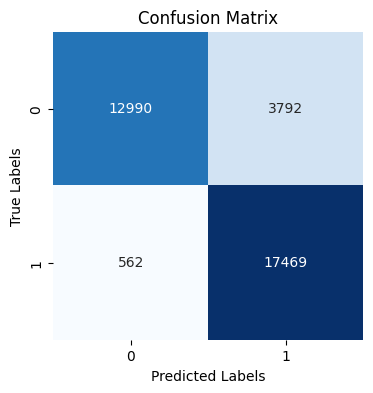

In [73]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm_all_cause_readmit = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm_all_cause_readmit, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Creating a Dataframe for All Causes Readmission

In [74]:
# creating a dataframe for all readmission
df_all_readmit = pd.DataFrame(y_test)
df_all_readmit = df_all_readmit.reset_index()
df_all_readmit['y_pred_all_readmission'] = y_pred
df_all_readmit['y_pred_all_readmission_proba'] = y_pred_xgb_proba

In [75]:
df_all_readmit

,Internalpatientid,Readmission,y_pred_all_readmission,y_pred_all_readmission_proba
0,6,0,0,1.314993e-07
1,7,1,1,9.889776e-01
2,9,1,1,9.725966e-01
3,12,1,1,6.000643e-01
4,17,1,1,9.771005e-01
...,...,...,...,...
34808,64432,1,1,9.997754e-01
34809,106205,1,1,9.997750e-01
34810,138129,1,1,9.984097e-01
34811,145401,1,1,9.379712e-01


In [123]:
df_all_readmit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34813 entries, 0 to 34812
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Internalpatientid             34813 non-null  int64  
 1   y_true                        34813 non-null  int64  
 2   y_pred_all_readmission        34813 non-null  int64  
 3   y_pred_all_readmission_proba  34813 non-null  float32
dtypes: float32(1), int64(3)
memory usage: 952.0 KB


In [76]:
# renaming the "Readmission" column as "y_true"
df_all_readmit.rename(columns = {'Readmission':'y_true'}, inplace = True) 

In [77]:
df_all_readmit

,Internalpatientid,y_true,y_pred_all_readmission,y_pred_all_readmission_proba
0,6,0,0,1.314993e-07
1,7,1,1,9.889776e-01
2,9,1,1,9.725966e-01
3,12,1,1,6.000643e-01
4,17,1,1,9.771005e-01
...,...,...,...,...
34808,64432,1,1,9.997754e-01
34809,106205,1,1,9.997750e-01
34810,138129,1,1,9.984097e-01
34811,145401,1,1,9.379712e-01


# **Tier-1 Statistics Metrics for All Cause Readmission** 

### Area under the precision recall curve (AUPRC)

In [78]:
# Data to plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb_proba)
# Use AUC function to calculate the area under the curve of the precision-recall curve
auc_precision_recall = auc(recall, precision)
print("Area under the precision recall curve (AUPRC):",auc_precision_recall)

Area under the precision recall curve (AUPRC): 0.9098290675401361


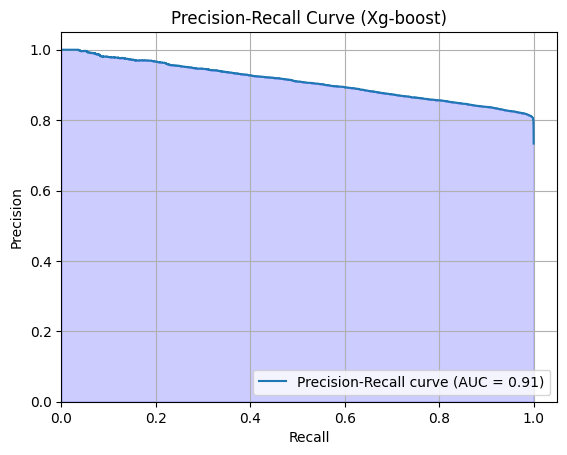

In [79]:
# Plot Precision-Recall curve
plt.figure()
sns.lineplot(x=recall, y=precision, drawstyle='steps-post', label='Precision-Recall curve (AUC = %0.2f)' % auc_precision_recall)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')  # Fill the area under the curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-Recall Curve (Xg-boost)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Area under the Receiver Operating Characteristic (AUROC)

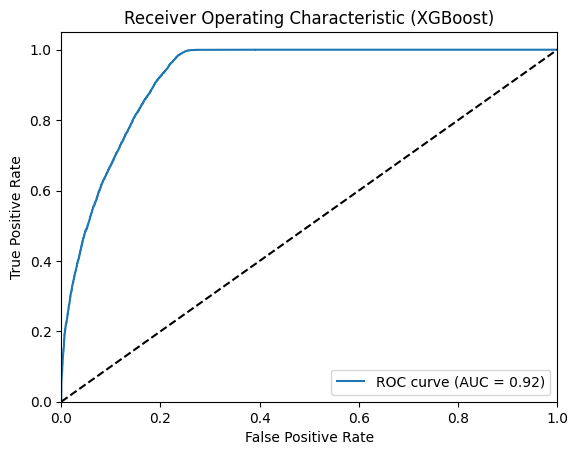

In [80]:
# Get the predicted probabilities for positive class (class 1)
xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.show()

In [81]:
# Print AUC score
print("Area under the Receiver Operating Characteristic (AUROC):", roc_auc)

Area under the Receiver Operating Characteristic (AUROC): 0.9247956324586477


### Overall accuracy

In [82]:
# Overall accuracy
accuracy = accuracy_score(y_test, xgb_y_pred)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.8749317783586591


### Sum of Sensitivity and Specificity

In [83]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, xgb_y_pred).ravel()
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Sensitivity (Recall): 0.9688314569352782
Specificity: 0.7740436181623168


In [84]:
# Sum of Sensitivity and Specificity
sum_sensitivity_specificity = sensitivity + specificity
print("Sum of Sensitivity and Specificity:", sum_sensitivity_specificity)

Sum of Sensitivity and Specificity: 1.742875075097595


------

# **Tier-2 Statistics Metrics for All Cause Readmission**

### Sensitivity (Recall)

In [85]:
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.9688314569352782


### Specificity

In [86]:
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.7740436181623168


### Precision

In [87]:
# Precision
precision = precision_score(y_test, xgb_y_pred)
print("Precision:", precision)

Precision: 0.8216452659799633


### Negative Predictive Value (NPV)

In [88]:
# Negative Predictive Value (NPV)
npv = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv)

Negative Predictive Value (NPV): 0.958530106257379


### Positive Likelihood Ratio (PLR)

In [89]:
# Positive Likelihood Ratio (PLR)
plr = sensitivity / (1 - specificity)
print("Positive Likelihood Ratio (PLR):", plr)

Positive Likelihood Ratio (PLR): 4.287692381405021


### Negative Likelihood Ratio (NLR)

In [90]:
# Negative Likelihood Ratio (NLR)
nlr = (1 - sensitivity) / specificity
print("Negative Likelihood Ratio (NLR):", nlr)

Negative Likelihood Ratio (NLR): 0.04026716625959675


### F1 Score

In [91]:
# F1 Score
f1 = f1_score(y_test, xgb_y_pred)
print("F1 Score:", f1)

F1 Score: 0.8891886389086838


---

## **Impoting Cardiovascular/ Non-Cardiovascular CSV Target Generated File**

**How we segregate the Cardiac and Non cardiac patients?**
- To segregate Cardiac and Non-cardiac patients, we used the 'Condition code icd10 subcategory' column from the 'condition' file. By conducting a word search caping using the disease names mentioned in the PrecisionFDA document. And then we classified patients into two distinct groups: Cardiac (1) and Non-cardiac (0) patients.

- **Note:** For a detailed explanation, kindly review the Python notebook titled "df_cv_non_cv_test_V1.ipynb" available under the specified location.

In [92]:
df_cv_non_cv = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/df_cv_non_cv_test_V1.csv')

In [93]:
# Taking the cv alone(1)
df_cv = df_cv_non_cv[df_cv_non_cv['cv_df']==1]

# taking the necessary features
df_cv = df_cv[['Internalpatientid','cv_df']]
df_cv

,Internalpatientid,cv_df
2,9,1
3,12,1
5,22,1
6,25,1
10,53,1
...,...,...
34805,169011,1
34807,169024,1
34808,169037,1
34810,169058,1


### Merging Cardivasucular Patients and All Cause Readmitted Patients

In [94]:
# merging the all readmission and cardiac patients(Here u will get which patients have cardivasucular and which are the patients readmitted due to the CV)
df_cv_readmit = pd.merge(df_all_readmit, df_cv, on ="Internalpatientid", how="inner")

In [95]:
df_cv_readmit 

,Internalpatientid,y_true,y_pred_all_readmission,y_pred_all_readmission_proba,cv_df
0,9,1,1,0.972597,1
1,12,1,1,0.600064,1
2,22,1,1,0.999997,1
3,25,1,1,0.980865,1
4,53,0,1,0.996976,1
...,...,...,...,...,...
11638,160195,1,1,0.965069,1
11639,167208,1,1,0.999999,1
11640,167963,1,1,0.999995,1
11641,168458,1,1,0.999998,1


In [96]:
df_cv_readmit.rename(columns={'y_pred_all_readmission':'y_pred_cv_readmission','y_pred_all_readmission_proba':'y_pred_cv_readmission_proba'},inplace = True)

In [97]:
df_cv_readmit

,Internalpatientid,y_true,y_pred_cv_readmission,y_pred_cv_readmission_proba,cv_df
0,9,1,1,0.972597,1
1,12,1,1,0.600064,1
2,22,1,1,0.999997,1
3,25,1,1,0.980865,1
4,53,0,1,0.996976,1
...,...,...,...,...,...
11638,160195,1,1,0.965069,1
11639,167208,1,1,0.999999,1
11640,167963,1,1,0.999995,1
11641,168458,1,1,0.999998,1


In [98]:
print(classification_report(df_cv_readmit.y_true, df_cv_readmit.y_pred_cv_readmission))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      5652
           1       0.83      0.97      0.89      5991

    accuracy                           0.88     11643
   macro avg       0.89      0.88      0.88     11643
weighted avg       0.89      0.88      0.88     11643



### Confusion Matrix for Cardivasucular Readmitted Patients 

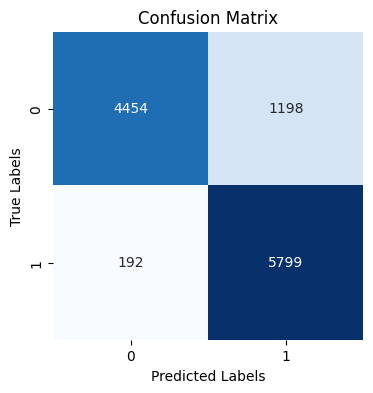

In [99]:
# Create the confusion matrix
cm_cv_readmit = confusion_matrix(df_cv_readmit.y_true, df_cv_readmit.y_pred_cv_readmission)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm_cv_readmit, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Tier 1 Statistics Metrics for Readmitted CV Patients** 

### Area under the precision recall curve (AUPRC)

In [100]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(df_cv_readmit.y_true, df_cv_readmit.y_pred_cv_readmission_proba)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print("Area under the precision recall curve (AUPRC):",auc_precision_recall)

Area under the precision recall curve (AUPRC): 0.9168609436882692


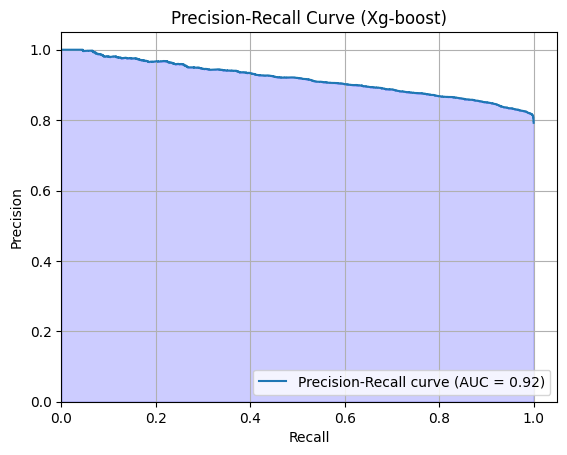

In [101]:
# Plot Precision-Recall curve
plt.figure()
sns.lineplot(x=recall, y=precision, drawstyle='steps-post', label='Precision-Recall curve (AUC = %0.2f)' % auc_precision_recall)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')  # Fill the area under the curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-Recall Curve (Xg-boost)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Area under the Receiver Operating Characteristic (AUROC)

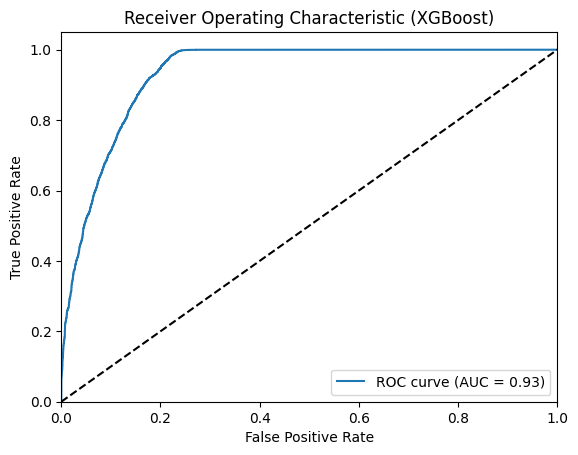

In [102]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df_cv_readmit.y_true, df_cv_readmit.y_pred_cv_readmission_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.show()

In [103]:
# Print AUC score
print("Area under the Receiver Operating Characteristic (AUROC):", roc_auc)

Area under the Receiver Operating Characteristic (AUROC): 0.9322917349603079


### Overall Accuracy

In [104]:
accuracy = accuracy_score(df_cv_readmit.y_true, df_cv_readmit.y_pred_cv_readmission)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.8806149617796101


### The sum of Sensitivity and Specificity

In [105]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(df_cv_readmit.y_true, df_cv_readmit.y_pred_cv_readmission).ravel()
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Sensitivity (Recall): 0.9679519278918377
Specificity: 0.7880396319886765


In [106]:
# Sum of Sensitivity and Specificity
sum_sensitivity_specificity = sensitivity + specificity
print("Sum of Sensitivity and Specificity:", sum_sensitivity_specificity)

Sum of Sensitivity and Specificity: 1.7559915598805143


# **Tier 2 Statistics Metrics for Readmitted CV Patients** 

### Sensitivity (Recall)

In [107]:
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.9679519278918377


### Specificity

In [108]:
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.7880396319886765


### Precision

In [109]:
# Precision
precision = precision_score(df_cv_readmit.y_true, df_cv_readmit.y_pred_cv_readmission)
print("Precision:", precision)

Precision: 0.8287837644704874


### Negative Predictive Value (NPV)

In [110]:
# Negative Predictive Value (NPV)
npv = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv)

Negative Predictive Value (NPV): 0.9586741282823935


### Positive Likelihood Ratio (PLR)

In [111]:
plr = sensitivity / (1 - specificity)
print("Positive Likelihood Ratio (PLR):", plr)

Positive Likelihood Ratio (PLR): 4.566664688184195


### Negative Likelihood Ratio (NLR)

In [112]:
nlr = (1 - sensitivity) / specificity
print("Negative Likelihood Ratio (NLR):", nlr)

Negative Likelihood Ratio (NLR): 0.040668096891632984


### F1 Score

In [113]:
# F1 Score
f1 = f1_score(df_cv_readmit.y_true, df_cv_readmit.y_pred_cv_readmission)
print("F1 Score:", f1)

F1 Score: 0.8929781336618416


---

## **Generating the Figure-1 CSV as per FDA for Test Data**

In [114]:
# Getting all the PID
df_allreadmit_cvreadmit = pd.merge(df_all_readmit,df_cv_readmit,on="Internalpatientid",how="outer")

In [115]:
df_allreadmit_cvreadmit

,Internalpatientid,y_true_x,y_pred_all_readmission,y_pred_all_readmission_proba,y_true_y,y_pred_cv_readmission,y_pred_cv_readmission_proba,cv_df
0,6,0,0,1.314993e-07,NaN,NaN,NaN,NaN
1,7,1,1,9.889776e-01,NaN,NaN,NaN,NaN
2,9,1,1,9.725966e-01,1.0,1.0,0.972597,1.0
3,12,1,1,6.000643e-01,1.0,1.0,0.600064,1.0
4,17,1,1,9.771005e-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
34808,64432,1,1,9.997754e-01,NaN,NaN,NaN,NaN
34809,106205,1,1,9.997750e-01,NaN,NaN,NaN,NaN
34810,138129,1,1,9.984097e-01,NaN,NaN,NaN,NaN
34811,145401,1,1,9.379712e-01,NaN,NaN,NaN,NaN


In [116]:
df_allreadmit_cvreadmit.drop(['y_true_y','cv_df'],axis=1,inplace=True)

In [117]:
# Filling the null 
df_allreadmit_cvreadmit['y_pred_cv_readmission'] = df_allreadmit_cvreadmit['y_pred_cv_readmission'].fillna(0)
df_allreadmit_cvreadmit['y_pred_cv_readmission_proba'] = df_allreadmit_cvreadmit['y_pred_cv_readmission_proba'].fillna(0)

In [118]:
df_allreadmit_cvreadmit

,Internalpatientid,y_true_x,y_pred_all_readmission,y_pred_all_readmission_proba,y_pred_cv_readmission,y_pred_cv_readmission_proba
0,6,0,0,1.314993e-07,0.0,0.000000
1,7,1,1,9.889776e-01,0.0,0.000000
2,9,1,1,9.725966e-01,1.0,0.972597
3,12,1,1,6.000643e-01,1.0,0.600064
4,17,1,1,9.771005e-01,0.0,0.000000
...,...,...,...,...,...,...
34808,64432,1,1,9.997754e-01,0.0,0.000000
34809,106205,1,1,9.997750e-01,0.0,0.000000
34810,138129,1,1,9.984097e-01,0.0,0.000000
34811,145401,1,1,9.379712e-01,0.0,0.000000


In [119]:
df_allreadmit_cvreadmit['y_pred_cv_readmission'] =  df_allreadmit_cvreadmit['y_pred_cv_readmission'].astype('int')

In [120]:
df_allreadmit_cvreadmit

,Internalpatientid,y_true_x,y_pred_all_readmission,y_pred_all_readmission_proba,y_pred_cv_readmission,y_pred_cv_readmission_proba
0,6,0,0,1.314993e-07,0,0.000000
1,7,1,1,9.889776e-01,0,0.000000
2,9,1,1,9.725966e-01,1,0.972597
3,12,1,1,6.000643e-01,1,0.600064
4,17,1,1,9.771005e-01,0,0.000000
...,...,...,...,...,...,...
34808,64432,1,1,9.997754e-01,0,0.000000
34809,106205,1,1,9.997750e-01,0,0.000000
34810,138129,1,1,9.984097e-01,0,0.000000
34811,145401,1,1,9.379712e-01,0,0.000000


In [121]:
fig1_readmit = df_allreadmit_cvreadmit
fig1_readmit = fig1_readmit[['Internalpatientid','y_pred_all_readmission','y_pred_all_readmission_proba','y_pred_cv_readmission','y_pred_cv_readmission_proba']]
fig1_readmit.rename(columns={'y_pred_all_readmission':'Hospital readmission for all causes "Binary"',
                             'y_pred_all_readmission_proba':'Hospital readmission for all causes "Continuous"',
                             'y_pred_cv_readmission':'Hospital readmission for Cardiovascular causes "Binary"',
                             'y_pred_cv_readmission_proba':'Hospital readmission for Cardiovascular causes "Continuous"'},inplace = True)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [122]:
fig1_readmit

,Internalpatientid,"Hospital readmission for all causes ""Binary""","Hospital readmission for all causes ""Continuous""","Hospital readmission for Cardiovascular causes ""Binary""","Hospital readmission for Cardiovascular causes ""Continuous"""
0,6,0,1.314993e-07,0,0.000000
1,7,1,9.889776e-01,0,0.000000
2,9,1,9.725966e-01,1,0.972597
3,12,1,6.000643e-01,1,0.600064
4,17,1,9.771005e-01,0,0.000000
...,...,...,...,...,...
34808,64432,1,9.997754e-01,0,0.000000
34809,106205,1,9.997750e-01,0,0.000000
34810,138129,1,9.984097e-01,0,0.000000
34811,145401,1,9.379712e-01,0,0.000000


### **Saving Test Output CSV file: Hospital Readmission for All Causes & Hospital Readmission Cardiovascular Causes**

In [125]:
fig1_readmit.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_test/Potential_files_test/fig1_readmit_v1.csv')

---

# **Quality Check data**

### **Retrieve the Quality check Data**

In [126]:
# List of file paths
file_paths = [ '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_quality/df_conditions_quality.csv', 
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_quality/df_immunizations_quality.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_quality/df_lab_results_qual_with_age_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_quality/df_inpatient_admission_qual.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_quality/df_measurement_blood_pressure_qual_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_quality/df_measurements_pivot_qual_v1.csv', 
]

# Read the first file to create the merged DataFrame
merged_df_qual = pd.read_csv(file_paths[0])
merged_df_qual.drop(["Unnamed: 0"], axis=1, inplace =True)

# Iterate over the remaining files and merge them based on 'internalpatientid'
# The `file_paths[1:]` slice returns a new list that includes all elements from the original `file_paths` list starting from the second element (index 1) to the end of the list.
#This slicing operation is used to iterate over the file paths of all CSV files except the first one.
#the loop iterates over all the file paths starting from the second file (`death.csv`) to the last file (`visits.csv`), excluding the first file (`conditions.csv`).
for file_path in file_paths[1:]:
    df = pd.read_csv(file_path) # read the csv file into the dataframe
    if "Unnamed: 0" in df.columns:
        df.drop(["Unnamed: 0"], axis=1, inplace =True)
    #merged_df ios the first that actually we read'''
    merged_df_qual = merged_df_qual.merge(df, on='Internalpatientid', how='outer') # merge with existing merged_df dataframe and how='outer' which perform the outer join

In [127]:
merged_df_qual

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory,inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature
0,67,58_Encounter for immunization,"58_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...",58_FIT_Negative,57_COVID-19,57_Hypertensive heart and chronic kidney disea...,86.0,141.0,5.0,68.0,18.0,99.304386
1,200,88_Vascular dementia,"87_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","88_Mchc_33.94,88_Mch_31.07,88_RDW-CV_13.7,88_H...",84_Acute and chronic respiratory failure,84_(Censored),79.0,134.0,0.0,92.0,18.0,93.422097
2,291,83_Secondary and unspecified malignant neoplas...,"82_FLU,3 YRS (HISTORICAL),82_INFLUENZA, UNSPEC...",83_FINGERSTICK GLUCOSE_75.0,"83_Malignant neoplasm of middle lobe, bronchus...",83_Secondary malignant neoplasm of lung,69.0,129.0,0.0,75.0,18.0,98.475425
3,330,75_Encounter for immunization,"75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_SODIUM_140.0,75_CHLORIDE_104.0,75_POTASSIUM...",73_Other specified sepsis,73_Other specified bacterial agents as the cau...,58.0,117.0,2.0,67.0,16.0,95.141939
4,351,86_Other chronic osteomyelitis,82_TDAP,"86_MCHC_33.93,86_Mpv_7.11,86_RDW_18.65,86_Hgb_...",86_Hypertensive heart disease with heart failure,86_Diastolic (congestive) heart failure,77.0,167.0,0.0,73.0,19.0,95.922920
...,...,...,...,...,...,...,...,...,...,...,...,...
995,100314,NaN,"74_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED...","74_Hct_23.76,74_Mpv_10.0,74_IMMATURE GRANS, AU...",74_Cardiogenic shock,74_Combined systolic (congestive) and diastoli...,51.0,102.0,0.0,119.0,19.0,94.094860
996,128935,NaN,95_TDAP,95_MRSA SURVL NARES DNA_POSITIVE,95_Hypertensive chronic kidney disease with st...,95_End stage renal disease,71.0,150.0,0.0,87.0,29.0,94.603855
997,132010,NaN,79_ZOSTER RECOMBINANT,79_MRSA SURVL NARES DNA_Negative,79_Pneumonitis due to inhalation of food and v...,79_Acute respiratory failure,69.0,104.0,7.0,115.0,18.0,101.190595
998,149757,NaN,"89_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...",89_MRSA SURVL NARES AGAR ADMIT_Negative,"89_Pneumonia, unspecified organism,89_Malignan...","89_Other and unspecified encephalopathy,89_Pne...",87.0,139.0,6.0,79.0,15.0,97.587912


#### **Set the Index values as 'Internalpatientid'**

In [128]:
merged_df_qc = merged_df_qual.set_index('Internalpatientid')

In [129]:
merged_df_qc

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory,inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature
Internalpatientid,,,,,,,,,,,
67,58_Encounter for immunization,"58_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...",58_FIT_Negative,57_COVID-19,57_Hypertensive heart and chronic kidney disea...,86.0,141.0,5.0,68.0,18.0,99.304386
200,88_Vascular dementia,"87_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","88_Mchc_33.94,88_Mch_31.07,88_RDW-CV_13.7,88_H...",84_Acute and chronic respiratory failure,84_(Censored),79.0,134.0,0.0,92.0,18.0,93.422097
291,83_Secondary and unspecified malignant neoplas...,"82_FLU,3 YRS (HISTORICAL),82_INFLUENZA, UNSPEC...",83_FINGERSTICK GLUCOSE_75.0,"83_Malignant neoplasm of middle lobe, bronchus...",83_Secondary malignant neoplasm of lung,69.0,129.0,0.0,75.0,18.0,98.475425
330,75_Encounter for immunization,"75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_SODIUM_140.0,75_CHLORIDE_104.0,75_POTASSIUM...",73_Other specified sepsis,73_Other specified bacterial agents as the cau...,58.0,117.0,2.0,67.0,16.0,95.141939
351,86_Other chronic osteomyelitis,82_TDAP,"86_MCHC_33.93,86_Mpv_7.11,86_RDW_18.65,86_Hgb_...",86_Hypertensive heart disease with heart failure,86_Diastolic (congestive) heart failure,77.0,167.0,0.0,73.0,19.0,95.922920
...,...,...,...,...,...,...,...,...,...,...,...
100314,NaN,"74_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED...","74_Hct_23.76,74_Mpv_10.0,74_IMMATURE GRANS, AU...",74_Cardiogenic shock,74_Combined systolic (congestive) and diastoli...,51.0,102.0,0.0,119.0,19.0,94.094860
128935,NaN,95_TDAP,95_MRSA SURVL NARES DNA_POSITIVE,95_Hypertensive chronic kidney disease with st...,95_End stage renal disease,71.0,150.0,0.0,87.0,29.0,94.603855
132010,NaN,79_ZOSTER RECOMBINANT,79_MRSA SURVL NARES DNA_Negative,79_Pneumonitis due to inhalation of food and v...,79_Acute respiratory failure,69.0,104.0,7.0,115.0,18.0,101.190595


### **Missing Values Imputation for Quality Data**

In [130]:
merged_df_qc.isnull().sum()

Condition_code_icd10_subcategory                                             11
immunization                                                                 61
Lab_test_description_Result                                                  30
inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory     368
inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory    368
Diastolic bp                                                                  7
Systolic bp                                                                   7
Pain                                                                         21
Pulse                                                                        21
Respiratory rate                                                             21
Temperature                                                                  21
dtype: int64

#### Combining Two Columns into a New Column - Inpatient_admission_first_and_second_listed

In [131]:
# Combine the two columns into a new column separated by commas
merged_df_qc['Inpatient_admission_first_and_second_listed'] = merged_df_qc['inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory'] + ',' + merged_df_qc['inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory']

# Remove the original columns
merged_df_qc.drop(['inpatient_admissions_First_listed_discharge_diagnosis_icd10_subcategory', 'inpatient_admissions_Second_listed_discharge_diagnosis_icd10_subcategory'], axis=1, inplace=True)

#### Replacing NaN Values in 'Inpatient_admission_first_and_second_listed' with Corresponding 'Condition_code_icd10_subcategory' Values

In [132]:
# Replace NaN values with corresponding 'Condition_code_icd10_subcategory' values
merged_df_qc['Inpatient_admission_first_and_second_listed'] = merged_df_qc['Inpatient_admission_first_and_second_listed'].fillna(merged_df_qc['Condition_code_icd10_subcategory'])

#### Replacing NaN Values with "Positive/Negative" for Textual Columns

In [133]:
# Define the columns to replace NaN values
columns = ['Condition_code_icd10_subcategory','immunization', 'Lab_test_description_Result']
# Replace NaN values with "Positive" or "Negative"
merged_df_qc[columns] = merged_df_qc[columns].replace(np.nan, 'Positive/Negative')

#### Replacing Mean Values - 'Diastolic bp', 'Systolic bp', 'Pain', 'Pulse', 'Respiratory rate', 'Temperature'

In [134]:
mean_values = merged_df_qc[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].mean()
mean_values

Pain                  1.721144
Pulse                78.361593
Respiratory rate     18.625128
Temperature          97.511688
Diastolic bp         70.286347
Systolic bp         126.014053
dtype: float64

In [135]:
# filling the null values
merged_df_qc[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']] = merged_df_qc[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].fillna(mean_values)

In [136]:
merged_df_qc.isnull().sum()

Condition_code_icd10_subcategory               0
immunization                                   0
Lab_test_description_Result                    0
Diastolic bp                                   0
Systolic bp                                    0
Pain                                           0
Pulse                                          0
Respiratory rate                               0
Temperature                                    0
Inpatient_admission_first_and_second_listed    0
dtype: int64

In [137]:
df_qual = merged_df_qc

In [138]:
df_qual

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,Inpatient_admission_first_and_second_listed
Internalpatientid,,,,,,,,,,
67,58_Encounter for immunization,"58_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...",58_FIT_Negative,86.0,141.0,5.0,68.0,18.0,99.304386,"57_COVID-19,57_Hypertensive heart and chronic ..."
200,88_Vascular dementia,"87_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","88_Mchc_33.94,88_Mch_31.07,88_RDW-CV_13.7,88_H...",79.0,134.0,0.0,92.0,18.0,93.422097,"84_Acute and chronic respiratory failure,84_(C..."
291,83_Secondary and unspecified malignant neoplas...,"82_FLU,3 YRS (HISTORICAL),82_INFLUENZA, UNSPEC...",83_FINGERSTICK GLUCOSE_75.0,69.0,129.0,0.0,75.0,18.0,98.475425,"83_Malignant neoplasm of middle lobe, bronchus..."
330,75_Encounter for immunization,"75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_SODIUM_140.0,75_CHLORIDE_104.0,75_POTASSIUM...",58.0,117.0,2.0,67.0,16.0,95.141939,"73_Other specified sepsis,73_Other specified b..."
351,86_Other chronic osteomyelitis,82_TDAP,"86_MCHC_33.93,86_Mpv_7.11,86_RDW_18.65,86_Hgb_...",77.0,167.0,0.0,73.0,19.0,95.922920,86_Hypertensive heart disease with heart failu...
...,...,...,...,...,...,...,...,...,...,...
100314,Positive/Negative,"74_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED...","74_Hct_23.76,74_Mpv_10.0,74_IMMATURE GRANS, AU...",51.0,102.0,0.0,119.0,19.0,94.094860,"74_Cardiogenic shock,74_Combined systolic (con..."
128935,Positive/Negative,95_TDAP,95_MRSA SURVL NARES DNA_POSITIVE,71.0,150.0,0.0,87.0,29.0,94.603855,95_Hypertensive chronic kidney disease with st...
132010,Positive/Negative,79_ZOSTER RECOMBINANT,79_MRSA SURVL NARES DNA_Negative,69.0,104.0,7.0,115.0,18.0,101.190595,79_Pneumonitis due to inhalation of food and v...


### **Splitting the Quality Dataframe into Textual and Numerical**

In [139]:
# Split the dataframe into df1, df2, and target dataframes
df1_qual = df_qual[['Condition_code_icd10_subcategory','immunization','Lab_test_description_Result','Inpatient_admission_first_and_second_listed']]
df2_qual = df_qual[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']]

### **Quality check - Textual Data**

In [140]:
df1_qual

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Inpatient_admission_first_and_second_listed
Internalpatientid,,,,
67,58_Encounter for immunization,"58_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...",58_FIT_Negative,"57_COVID-19,57_Hypertensive heart and chronic ..."
200,88_Vascular dementia,"87_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","88_Mchc_33.94,88_Mch_31.07,88_RDW-CV_13.7,88_H...","84_Acute and chronic respiratory failure,84_(C..."
291,83_Secondary and unspecified malignant neoplas...,"82_FLU,3 YRS (HISTORICAL),82_INFLUENZA, UNSPEC...",83_FINGERSTICK GLUCOSE_75.0,"83_Malignant neoplasm of middle lobe, bronchus..."
330,75_Encounter for immunization,"75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_SODIUM_140.0,75_CHLORIDE_104.0,75_POTASSIUM...","73_Other specified sepsis,73_Other specified b..."
351,86_Other chronic osteomyelitis,82_TDAP,"86_MCHC_33.93,86_Mpv_7.11,86_RDW_18.65,86_Hgb_...",86_Hypertensive heart disease with heart failu...
...,...,...,...,...
100314,Positive/Negative,"74_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED...","74_Hct_23.76,74_Mpv_10.0,74_IMMATURE GRANS, AU...","74_Cardiogenic shock,74_Combined systolic (con..."
128935,Positive/Negative,95_TDAP,95_MRSA SURVL NARES DNA_POSITIVE,95_Hypertensive chronic kidney disease with st...
132010,Positive/Negative,79_ZOSTER RECOMBINANT,79_MRSA SURVL NARES DNA_Negative,79_Pneumonitis due to inhalation of food and v...


### **Quality check - Numerical Data**

In [141]:
df2_qual

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
Internalpatientid,,,,,,
67,5.0,68.0,18.0,99.304386,86.0,141.0
200,0.0,92.0,18.0,93.422097,79.0,134.0
291,0.0,75.0,18.0,98.475425,69.0,129.0
330,2.0,67.0,16.0,95.141939,58.0,117.0
351,0.0,73.0,19.0,95.922920,77.0,167.0
...,...,...,...,...,...,...
100314,0.0,119.0,19.0,94.094860,51.0,102.0
128935,0.0,87.0,29.0,94.603855,71.0,150.0
132010,7.0,115.0,18.0,101.190595,69.0,104.0


### **Standardizing the Numerical Columns in Quality Data**

In [142]:
# Standardize the numerical columns
stand_df2_qual = pd.DataFrame(scaler.transform(df2_qual),  columns=df2_qual.columns)

In [143]:
# Set the index of the standardized DataFrames back to the original values
stand_df2_qual.index = df2_qual.index

In [144]:
stand_df2_qual

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
Internalpatientid,,,,,,
67,1.166334,-0.588483,-0.234950,0.550478,1.397002,0.738031
200,-0.614404,0.873768,-0.234950,-1.455913,0.785882,0.396997
291,-0.614404,-0.161993,-0.234950,0.267727,-0.087147,0.153402
330,0.097891,-0.649411,-0.967284,-0.869292,-1.047479,-0.431227
351,-0.614404,-0.283848,0.131217,-0.602907,0.611276,2.004727
...,...,...,...,...,...,...
100314,-0.614404,2.518801,0.131217,-1.226440,-1.658599,-1.162013
128935,-0.614404,0.569132,3.792887,-1.052827,0.087459,1.176503
132010,1.878629,2.275093,-0.234950,1.193845,-0.087147,-1.064575


### **Word Embedding for Textual Data in Quality Data**

In [145]:
# Encode the test data using the model
qual_encoded_condition = model.encode(df1_qual['Condition_code_icd10_subcategory'].tolist())

In [146]:
qual_encoded_immunization = model.encode(df1_qual['immunization'].tolist())

In [147]:
qual_encoded_lab = model.encode(df1_qual['Lab_test_description_Result'].tolist())

In [148]:
qual_encoded_inpatient = model.encode(df1_qual['Inpatient_admission_first_and_second_listed'].tolist())

In [149]:
qual_encoded_condition.shape

(1000, 768)

### Creating Dataframes for Encoded Data

In [150]:
### Create dataframes for encoded data
qual_condition = pd.DataFrame(qual_encoded_condition)
qual_immunization = pd.DataFrame(qual_encoded_immunization)
qual_lab = pd.DataFrame(qual_encoded_lab)
qual_inpatient = pd.DataFrame(qual_encoded_inpatient)

In [151]:
# Assuming df1_train has an index named 'index_name'
qual_condition.index = df1_qual.index
qual_immunization.index = df1_qual.index
qual_lab.index = df1_qual.index
qual_inpatient.index = df1_qual.index

### Concatenating the Dataframes Along Columns

In [152]:
qual_encoded = pd.concat([qual_condition, qual_immunization, qual_lab, qual_inpatient], axis=1)

In [153]:
qual_encoded 

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Internalpatientid,,,,,,,,,,,,,,,,,,,,,
67,-0.065457,-0.214875,0.167266,-0.103739,0.148852,-0.002346,0.236427,-0.101004,0.303514,0.051214,...,0.123294,-0.053918,-0.103398,-0.038732,-0.093030,-0.022862,0.060443,-0.170550,-0.086539,0.035728
200,-0.116049,-0.029910,0.028984,-0.003204,0.049394,0.071531,0.016984,0.249156,0.195013,0.125943,...,-0.050243,-0.195291,-0.206480,0.014501,-0.147112,0.185066,0.122316,-0.138405,-0.079061,-0.075099
291,0.098055,0.148627,0.004865,0.030749,-0.033483,0.019669,-0.040439,0.083331,-0.157529,0.081961,...,-0.016706,-0.095697,-0.026685,-0.025635,-0.094945,-0.063109,0.047066,-0.138652,-0.088465,-0.022685
330,-0.112037,-0.193050,0.139207,-0.088785,0.158870,0.025209,0.196612,-0.120163,0.296793,0.027440,...,-0.041150,-0.081888,0.003364,0.004283,-0.101147,-0.338528,0.134312,-0.125903,0.101520,-0.077223
351,-0.072377,0.162673,0.003920,-0.022423,0.049834,0.025052,0.002451,0.213248,0.247767,0.147139,...,0.172236,-0.051962,-0.083018,0.079762,-0.052624,-0.076035,0.065593,-0.102799,-0.026417,-0.060483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100314,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.142193,-0.108858,-0.096563,0.088745,-0.014565,0.015877,0.043093,-0.089432,-0.015187,0.040252
128935,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.083467,-0.055264,-0.003944,0.100993,-0.028726,-0.083690,0.105541,-0.114366,-0.155358,0.087803
132010,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,-0.006241,-0.177404,-0.304701,-0.070768,-0.045137,0.068977,-0.000762,-0.130891,-0.116083,-0.108125


### Rename the columns

In [154]:
# Rename the columns
num_columns = qual_condition.shape[1]  # Number of columns in each set of encoded data
column_names = []
for i in range(num_columns):
    column_names.append(f"condition_{i+1}")

for i in range(num_columns):
    column_names.append(f"immunization_{i+1}")

for i in range(num_columns):
    column_names.append(f"lab_{i+1}")

for i in range(num_columns):
    column_names.append(f"inpatient_{i+1}")

# Assign the new column names to the DataFrame
qual_encoded.columns = column_names

In [155]:
qual_encoded

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,inpatient_759,inpatient_760,inpatient_761,inpatient_762,inpatient_763,inpatient_764,inpatient_765,inpatient_766,inpatient_767,inpatient_768
Internalpatientid,,,,,,,,,,,,,,,,,,,,,
67,-0.065457,-0.214875,0.167266,-0.103739,0.148852,-0.002346,0.236427,-0.101004,0.303514,0.051214,...,0.123294,-0.053918,-0.103398,-0.038732,-0.093030,-0.022862,0.060443,-0.170550,-0.086539,0.035728
200,-0.116049,-0.029910,0.028984,-0.003204,0.049394,0.071531,0.016984,0.249156,0.195013,0.125943,...,-0.050243,-0.195291,-0.206480,0.014501,-0.147112,0.185066,0.122316,-0.138405,-0.079061,-0.075099
291,0.098055,0.148627,0.004865,0.030749,-0.033483,0.019669,-0.040439,0.083331,-0.157529,0.081961,...,-0.016706,-0.095697,-0.026685,-0.025635,-0.094945,-0.063109,0.047066,-0.138652,-0.088465,-0.022685
330,-0.112037,-0.193050,0.139207,-0.088785,0.158870,0.025209,0.196612,-0.120163,0.296793,0.027440,...,-0.041150,-0.081888,0.003364,0.004283,-0.101147,-0.338528,0.134312,-0.125903,0.101520,-0.077223
351,-0.072377,0.162673,0.003920,-0.022423,0.049834,0.025052,0.002451,0.213248,0.247767,0.147139,...,0.172236,-0.051962,-0.083018,0.079762,-0.052624,-0.076035,0.065593,-0.102799,-0.026417,-0.060483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100314,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.142193,-0.108858,-0.096563,0.088745,-0.014565,0.015877,0.043093,-0.089432,-0.015187,0.040252
128935,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.083467,-0.055264,-0.003944,0.100993,-0.028726,-0.083690,0.105541,-0.114366,-0.155358,0.087803
132010,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,-0.006241,-0.177404,-0.304701,-0.070768,-0.045137,0.068977,-0.000762,-0.130891,-0.116083,-0.108125


### **Concatenating Standardized Vectors and Embedded Vectors for Quality Data**

In [156]:
# Concatenating Standardized vectors and Embedded vectors for Test data
concatenated_df_qual = pd.concat([qual_encoded, stand_df2_qual], axis=1)
concatenated_df_qual

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,inpatient_765,inpatient_766,inpatient_767,inpatient_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
Internalpatientid,,,,,,,,,,,,,,,,,,,,,
67,-0.065457,-0.214875,0.167266,-0.103739,0.148852,-0.002346,0.236427,-0.101004,0.303514,0.051214,...,0.060443,-0.170550,-0.086539,0.035728,1.166334,-0.588483,-0.234950,0.550478,1.397002,0.738031
200,-0.116049,-0.029910,0.028984,-0.003204,0.049394,0.071531,0.016984,0.249156,0.195013,0.125943,...,0.122316,-0.138405,-0.079061,-0.075099,-0.614404,0.873768,-0.234950,-1.455913,0.785882,0.396997
291,0.098055,0.148627,0.004865,0.030749,-0.033483,0.019669,-0.040439,0.083331,-0.157529,0.081961,...,0.047066,-0.138652,-0.088465,-0.022685,-0.614404,-0.161993,-0.234950,0.267727,-0.087147,0.153402
330,-0.112037,-0.193050,0.139207,-0.088785,0.158870,0.025209,0.196612,-0.120163,0.296793,0.027440,...,0.134312,-0.125903,0.101520,-0.077223,0.097891,-0.649411,-0.967284,-0.869292,-1.047479,-0.431227
351,-0.072377,0.162673,0.003920,-0.022423,0.049834,0.025052,0.002451,0.213248,0.247767,0.147139,...,0.065593,-0.102799,-0.026417,-0.060483,-0.614404,-0.283848,0.131217,-0.602907,0.611276,2.004727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100314,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.043093,-0.089432,-0.015187,0.040252,-0.614404,2.518801,0.131217,-1.226440,-1.658599,-1.162013
128935,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.105541,-0.114366,-0.155358,0.087803,-0.614404,0.569132,3.792887,-1.052827,0.087459,1.176503
132010,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,-0.000762,-0.130891,-0.116083,-0.108125,1.878629,2.275093,-0.234950,1.193845,-0.087147,-1.064575


### **XGBoost Classifier**

In [157]:
X_qual = concatenated_df_qual

In [158]:
X_qual.shape

(1000, 3078)

In [159]:
xgb_y_pred_qc = xgb_model.predict(X_qual)
xgb_y_pred_proba_qc = xgb_model.predict_proba(X_qual)[:,1]

### Creating a Dataframe for All Causes Readmission for Quality Check Data

In [160]:
# creating a dataframe for all causes readmission
df_all_readmit_qc = pd.DataFrame(X_qual)
df_all_readmit_qc = df_all_readmit_qc.reset_index()
df_all_readmit_qc['y_pred_all_readmit'] = xgb_y_pred_qc
df_all_readmit_qc['y_pred_all_readmit_proba'] = xgb_y_pred_proba_qc

In [161]:
df_all_readmit_qc

,Internalpatientid,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,...,inpatient_767,inpatient_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp,y_pred_all_readmit,y_pred_all_readmit_proba
0,67,-0.065457,-0.214875,0.167266,-0.103739,0.148852,-0.002346,0.236427,-0.101004,0.303514,...,-0.086539,0.035728,1.166334,-0.588483,-0.234950,0.550478,1.397002,0.738031,1,0.996678
1,200,-0.116049,-0.029910,0.028984,-0.003204,0.049394,0.071531,0.016984,0.249156,0.195013,...,-0.079061,-0.075099,-0.614404,0.873768,-0.234950,-1.455913,0.785882,0.396997,1,0.997146
2,291,0.098055,0.148627,0.004865,0.030749,-0.033483,0.019669,-0.040439,0.083331,-0.157529,...,-0.088465,-0.022685,-0.614404,-0.161993,-0.234950,0.267727,-0.087147,0.153402,1,0.999799
3,330,-0.112037,-0.193050,0.139207,-0.088785,0.158870,0.025209,0.196612,-0.120163,0.296793,...,0.101520,-0.077223,0.097891,-0.649411,-0.967284,-0.869292,-1.047479,-0.431227,1,0.994659
4,351,-0.072377,0.162673,0.003920,-0.022423,0.049834,0.025052,0.002451,0.213248,0.247767,...,-0.026417,-0.060483,-0.614404,-0.283848,0.131217,-0.602907,0.611276,2.004727,1,0.991752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,100314,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,...,-0.015187,0.040252,-0.614404,2.518801,0.131217,-1.226440,-1.658599,-1.162013,1,0.998291
996,128935,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,...,-0.155358,0.087803,-0.614404,0.569132,3.792887,-1.052827,0.087459,1.176503,1,0.999946
997,132010,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,...,-0.116083,-0.108125,1.878629,2.275093,-0.234950,1.193845,-0.087147,-1.064575,1,0.999142
998,149757,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,...,-0.050235,-0.084914,1.522482,0.081715,-1.333451,-0.034994,1.484305,0.640593,1,0.999993


In [162]:
df_all_readmit_qc = df_all_readmit_qc[['Internalpatientid', 'y_pred_all_readmit', 'y_pred_all_readmit_proba']]

In [163]:
df_all_readmit_qc

,Internalpatientid,y_pred_all_readmit,y_pred_all_readmit_proba
0,67,1,0.996678
1,200,1,0.997146
2,291,1,0.999799
3,330,1,0.994659
4,351,1,0.991752
...,...,...,...
995,100314,1,0.998291
996,128935,1,0.999946
997,132010,1,0.999142
998,149757,1,0.999993


In [164]:
df_all_readmit_qc['y_pred_all_readmit'].value_counts()

1    594
0    406
Name: y_pred_all_readmit, dtype: int64

### **Importing Quality Check Cardiovascular/ Non-Cardiovascular CSV Target Generated File**

In [165]:
df_cv_non_cv_qc = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_quality/df_cv_non_cv_quality_V1.csv')

In [166]:
df_cv_non_cv_qc

,Unnamed: 0,Internalpatientid,cv_df
0,0,67,0
1,1,200,0
2,2,291,1
3,3,330,0
4,4,351,0
...,...,...,...
995,995,167907,0
996,996,167917,0
997,997,168008,0
998,998,168496,0


In [167]:
# Taking the cv alone(1)
df_cv_qc = df_cv_non_cv_qc[df_cv_non_cv_qc['cv_df']==1]

In [168]:
# taking the necessary features
df_cv_qc = df_cv_qc[['Internalpatientid','cv_df']]
df_cv_qc

,Internalpatientid,cv_df
2,291,1
5,444,1
6,714,1
9,1429,1
10,1451,1
...,...,...
973,164385,1
978,165284,1
981,165836,1
990,166856,1


### Merging Cardiovascular Patients and All Cause Readmitted Patients for Quality data

In [169]:
# merging the all mortality and cardiac patients(Here u will get which patients have cardivasucular and which are the patients died due to the CV)
df_cv_readmit_qc = pd.merge(df_all_readmit_qc, df_cv_qc, on ="Internalpatientid", how="inner")

In [170]:
df_cv_readmit_qc

,Internalpatientid,y_pred_all_readmit,y_pred_all_readmit_proba,cv_df
0,291,1,0.999799,1
1,444,1,0.996385,1
2,714,0,0.000923,1
3,1429,1,0.999207,1
4,1451,0,0.000725,1
...,...,...,...,...
313,166856,1,0.997534,1
314,168899,0,0.000004,1
315,88071,1,0.996504,1
316,100314,1,0.998291,1


In [171]:
df_cv_readmit_qc.rename(columns={'y_pred_all_readmit':'y_pred_cv_readmit','y_pred_all_readmit_proba':'y_pred_cv_readmit_proba'},inplace = True)

In [172]:
df_cv_readmit_qc

,Internalpatientid,y_pred_cv_readmit,y_pred_cv_readmit_proba,cv_df
0,291,1,0.999799,1
1,444,1,0.996385,1
2,714,0,0.000923,1
3,1429,1,0.999207,1
4,1451,0,0.000725,1
...,...,...,...,...
313,166856,1,0.997534,1
314,168899,0,0.000004,1
315,88071,1,0.996504,1
316,100314,1,0.998291,1


### **Generating the Figure-one CSV as per FDA For Quality Check**

In [173]:
# will get mortality for CV and mortality for non-cv
df_allreadmit_cvreadmit_qc = pd.merge(df_all_readmit_qc,df_cv_readmit_qc,on="Internalpatientid",how="outer")

In [174]:
df_allreadmit_cvreadmit_qc

,Internalpatientid,y_pred_all_readmit,y_pred_all_readmit_proba,y_pred_cv_readmit,y_pred_cv_readmit_proba,cv_df
0,67,1,0.996678,NaN,NaN,NaN
1,200,1,0.997146,NaN,NaN,NaN
2,291,1,0.999799,1.0,0.999799,1.0
3,330,1,0.994659,NaN,NaN,NaN
4,351,1,0.991752,NaN,NaN,NaN
...,...,...,...,...,...,...
995,100314,1,0.998291,1.0,0.998291,1.0
996,128935,1,0.999946,NaN,NaN,NaN
997,132010,1,0.999142,NaN,NaN,NaN
998,149757,1,0.999993,NaN,NaN,NaN


In [175]:
df_allreadmit_cvreadmit_qc.drop(['cv_df'],axis=1,inplace=True)

In [176]:
# Filling the null 
df_allreadmit_cvreadmit_qc['y_pred_cv_readmit'] =  df_allreadmit_cvreadmit_qc['y_pred_cv_readmit'].fillna(0)
df_allreadmit_cvreadmit_qc['y_pred_cv_readmit_proba'] = df_allreadmit_cvreadmit_qc['y_pred_cv_readmit_proba'].fillna(0)

In [177]:
df_allreadmit_cvreadmit_qc

,Internalpatientid,y_pred_all_readmit,y_pred_all_readmit_proba,y_pred_cv_readmit,y_pred_cv_readmit_proba
0,67,1,0.996678,0.0,0.000000
1,200,1,0.997146,0.0,0.000000
2,291,1,0.999799,1.0,0.999799
3,330,1,0.994659,0.0,0.000000
4,351,1,0.991752,0.0,0.000000
...,...,...,...,...,...
995,100314,1,0.998291,1.0,0.998291
996,128935,1,0.999946,0.0,0.000000
997,132010,1,0.999142,0.0,0.000000
998,149757,1,0.999993,0.0,0.000000


In [178]:
df_allreadmit_cvreadmit_qc['y_pred_cv_readmit'] =  df_allreadmit_cvreadmit_qc['y_pred_cv_readmit'].astype('int')

In [180]:
fig1_readmit_qc = df_allreadmit_cvreadmit_qc
fig1_readmit_qc.rename(columns={'y_pred_all_readmit':'Hospital readmission for all causes "Binary"',
                                'y_pred_all_readmit_proba':'Hospital readmission for all causes "Continuous"',
                                'y_pred_cv_readmit':'Hospital readmission for Cardiovascular causes "Binary"',
                                'y_pred_cv_readmit_proba':'Hospital readmission for Cardiovascular causes "Continuous"' },inplace = True)

In [181]:
fig1_readmit_qc

,Internalpatientid,"Hospital readmission for all causes ""Binary""","Hospital readmission for all causes ""Continuous""","Hospital readmission for Cardiovascular causes ""Binary""","Hospital readmission for Cardiovascular causes ""Continuous"""
0,67,1,0.996678,0,0.000000
1,200,1,0.997146,0,0.000000
2,291,1,0.999799,1,0.999799
3,330,1,0.994659,0,0.000000
4,351,1,0.991752,0,0.000000
...,...,...,...,...,...
995,100314,1,0.998291,1,0.998291
996,128935,1,0.999946,0,0.000000
997,132010,1,0.999142,0,0.000000
998,149757,1,0.999993,0,0.000000


### **Saving Quality Check Output CSV file: Hospital Readmission for All Causes & Hospital Readmission Cardiovascular Causes**

In [182]:
fig1_readmit_qc.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_quality/fig1_readmit_qc_v1.csv')

---